In [2]:
from local_search_solver import swap_elements, solve
from utils import Point
import matplotlib.pyplot as plt

1084


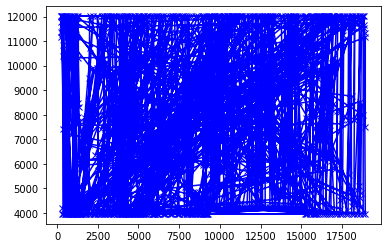

In [12]:
with open("data/tsp_1084_1") as f:
    input_data = f.read()
    
lines = input_data.split('\n')

nodeCount = int(lines[0])

points = []
for i in range(1, nodeCount+1):
    line = lines[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))
print(len(points))

plt.plot([point.x for point in points], [point.y for point in points], 'xb-')

[543, 646, 1044, 112, 802, 799, 730, 792, 894, 962, 1041, 619, 1054, 617, 107, 922, 34, 791, 786, 783, 795, 1001, 727, 793, 995, 986, 111, 1043, 108, 787, 790, 645, 1040, 605, 782, 893, 1055, 50, 950, 977, 1046, 591, 1016, 925, 588, 630, 86, 89, 743, 744, 852, 574, 696, 14, 18, 21, 595, 906, 758, 24, 27, 666, 638, 953, 718, 88, 745, 587, 1, 575, 1073, 848, 0, 576, 573, 896, 1072, 847, 804, 895, 342, 255, 349, 481, 286, 136, 483, 310, 459, 138, 467, 152, 460, 195, 343, 468, 311, 214, 479, 215, 313, 469, 147, 477, 475, 465, 524, 246, 175, 180, 149, 522, 466, 162, 354, 382, 362, 229, 423, 155, 163, 508, 370, 498, 442, 287, 397, 806, 156, 164, 526, 380, 91, 615, 600, 614, 599, 64, 613, 598, 612, 913, 611, 1083, 805, 1082, 1081, 5, 695, 693, 849, 2, 897, 1074, 4, 854, 694, 3, 850, 851, 853, 590, 629, 85, 937, 1047, 49, 616, 601, 1010, 914, 620, 603, 65, 602, 37, 536, 447, 419, 157, 166, 490, 360, 488, 438, 388, 341, 158, 277, 271, 272, 274, 116, 278, 280, 282, 284, 185, 413, 440, 509, 235, 

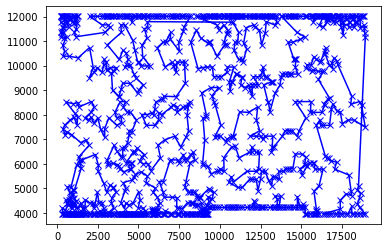

In [13]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'xb-')

counter = 1000
counter = 2000
counter = 3000
counter = 4000
counter = 5000
counter = 6000
counter = 7000
counter = 8000
counter = 9000
[25, 83, 32, 4, 45, 27, 1, 2, 28, 16, 77, 42, 7, 0, 36, 58, 56, 6, 69, 61, 76, 35, 84, 94, 40, 47, 72, 51, 93, 99, 22, 18, 19, 71, 43, 65, 37, 13, 89, 3, 33, 59, 39, 48, 85, 87, 73, 67, 66, 64, 60, 81, 96, 57, 41, 50, 12, 55, 98, 97, 49, 20, 90, 63, 78, 95, 52, 92, 21, 70, 23, 8, 34, 17, 79, 88, 86, 54, 24, 68, 53, 14, 15, 75, 46, 5, 91, 38, 80, 29, 30, 74, 10, 11, 9, 26, 31, 44, 62, 82]


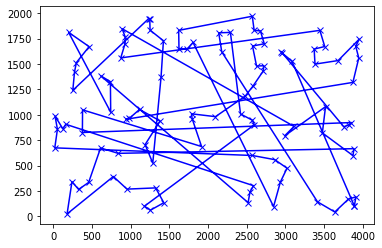

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'xb-')

[83, 92, 52, 95, 78, 49, 97, 20, 90, 63, 27, 45, 1, 54, 86, 25, 82, 62, 44, 31, 13, 89, 3, 17, 34, 38, 91, 57, 41, 6, 56, 58, 69, 18, 22, 99, 93, 51, 8, 23, 70, 21, 66, 64, 60, 81, 96, 28, 2, 33, 59, 39, 98, 55, 12, 50, 16, 77, 42, 7, 10, 74, 30, 0, 36, 61, 76, 35, 84, 48, 85, 87, 73, 67, 43, 37, 65, 71, 19, 24, 68, 15, 14, 75, 53, 46, 5, 29, 80, 11, 9, 26, 72, 47, 40, 94, 79, 88, 4, 32]


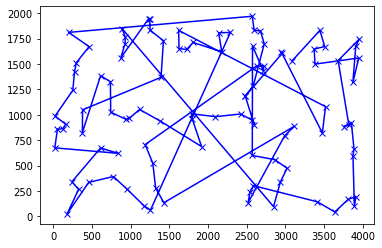

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[0].x], [points[i].y for i in best_path] + [points[0].y], 'xb-')

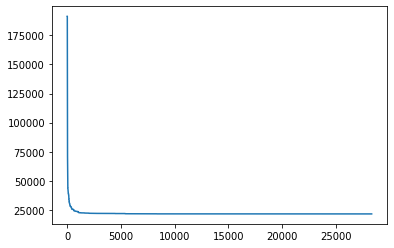

In [4]:
plt.plot([i for i in range(len(best_distances))], best_distances)

In [8]:
a = set([3,2,1])
a | {4}
a

{1, 2, 3}

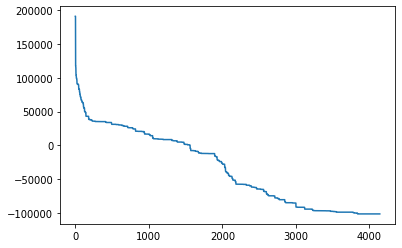

In [4]:
plt.plot([i for i in range(len(best_distances))], best_distances)

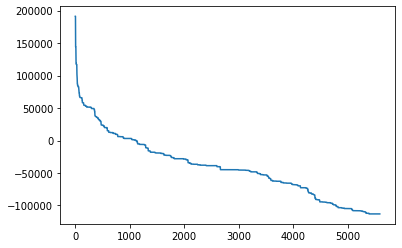

In [5]:
plt.plot([i for i in range(len(best_distances))], best_distances)

In [6]:
best_distances[-1]

19449.039769567436

In [4]:
best_distances[-1]

-112997.20499792784